In [1]:
import pandas as pd
import numpy as np
import warnings
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pylab import rcParams
import statsmodels.api as sm
import itertools
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller#statiionaty검증
from pandas import datetime
warnings.filterwarnings(action='ignore')

import matplotlib as mpl
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import seaborn as sns
font_name = fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc('font', family=font_name)

<ipython-input-1-3429e2f3a7dd>:14: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [2]:
df = pd.read_csv('D:\\data\\21.07_BMW미팅\\df_data\\07.17_21_월별_6브랜드_판매량.csv', encoding='utf-8')
df

,Unnamed: 0,브랜드,2017-01-01,2017-02-01,2017-03-01,2017-04-01,2017-05-01,2017-06-01,2017-07-01,2017-08-01,...,2020-08-01,2020-09-01,2020-10-01,2020-11-01,2020-12-01,2021-01-01,2021-02-01,2021-03-01,2021-04-01,2021-05-01
0,0,bmw,2415,3202,6164,6334,5373,5510,3188,4105,...,7252,5275,5320,5551,5749,5717,5660,6012,6113,6257
1,1,benz,6848,5534,6737,5758,5063,7783,5471,5267,...,6030,5958,6576,7186,9546,5918,5707,7597,8430,7690
2,2,audi,474,360,83,0,2,0,0,0,...,2022,2528,2527,2906,3109,2302,2362,2737,1320,229
3,3,volkswagen,0,0,0,0,0,0,0,0,...,881,872,1933,2677,2729,1236,1783,1628,1080,1358
4,4,mini,541,582,624,743,1013,841,794,826,...,1107,1108,890,940,1093,712,895,1224,1051,1095
5,5,volvo,436,570,675,542,596,693,624,602,...,336,801,1449,1267,1352,1198,1202,1251,1263,1264


In [3]:
df = df.drop(['Unnamed: 0'],axis=1)

In [4]:
bmw = df.loc[0]
bmw = bmw.reset_index()

In [5]:
benz = df.loc[1]
benz =benz.reset_index()

In [6]:
df2 = df.stack()

In [7]:
df2.reset_index()

,level_0,level_1,0
0,0,브랜드,bmw
1,0,2017-01-01,2415
2,0,2017-02-01,3202
3,0,2017-03-01,6164
4,0,2017-04-01,6334
...,...,...,...
319,5,2021-01-01,1198
320,5,2021-02-01,1202
321,5,2021-03-01,1251
322,5,2021-04-01,1263


In [7]:
result = pd.merge(bmw, benz, on=['index'], how='outer')
result.head()

,index,0,1
0,브랜드,bmw,benz
1,2017-01-01,2415,6848
2,2017-02-01,3202,5534
3,2017-03-01,6164,6737
4,2017-04-01,6334,5758


In [8]:
result.columns = ['year','BMW','Benz']

In [9]:
result = result.drop(index=[0], axis=0)
result.head()

,year,BMW,Benz
1,2017-01-01,2415,6848
2,2017-02-01,3202,5534
3,2017-03-01,6164,6737
4,2017-04-01,6334,5758
5,2017-05-01,5373,5063


In [10]:
# 데이터타입 바꾸기
result = result.astype({'BMW':'int'})
result = result.astype({'Benz':'int'})

In [11]:
# transacted_date, transacted_time 데이터 타입 string으로 인식하여 datetime64로 변환(column.dt.시간단위를 통해서 원하는 시간 부분을 추출해서 활용할 수 있음)
result['year'] = pd.to_datetime(result['year'])

In [13]:
result.head()

,year,BMW,Benz
1,2017-01-01,2415,6848
2,2017-02-01,3202,5534
3,2017-03-01,6164,6737
4,2017-04-01,6334,5758
5,2017-05-01,5373,5063


In [12]:
#인덱스를 연도로 재설정
result.index = result['year']
result.set_index('year', inplace=True)
result.head()

,BMW,Benz
year,,
2017-01-01,2415,6848
2017-02-01,3202,5534
2017-03-01,6164,6737
2017-04-01,6334,5758
2017-05-01,5373,5063


<AxesSubplot:xlabel='year'>

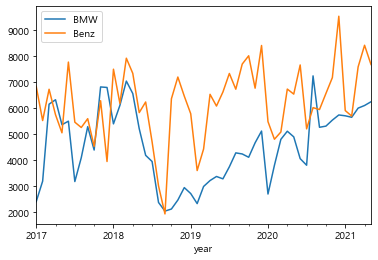

In [13]:
result.plot()

In [16]:
result = result.reset_index()
result.head()

,year,BMW,Benz
0,2017-01-01,2415,6848
1,2017-02-01,3202,5534
2,2017-03-01,6164,6737
3,2017-04-01,6334,5758
4,2017-05-01,5373,5063


In [17]:
result = result.drop('index', axis=1)

KeyError: "['index'] not found in axis"

<AxesSubplot:xlabel='year'>

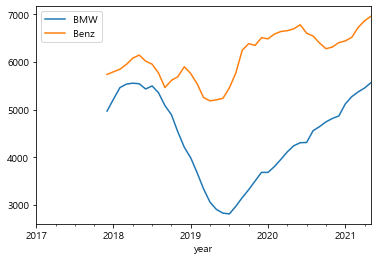

In [14]:
# BMW, Benz stationary 확인
timeseries = result
timeseries.rolling(12).mean().plot()#12개월평균

## Set up and plot the training data

In [21]:
# Benz data만 따로 
result_Benz = result['Benz']
result_Benz = result_Benz.reset_index()

In [22]:
len(result_Benz)

53

In [23]:
result_Benz.head()

,year,Benz
0,2017-01-01,6848
1,2017-02-01,5534
2,2017-03-01,6737
3,2017-04-01,5758
4,2017-05-01,5063


In [24]:
# Benz 인덱스 year 재설정
result_Benz.index = result_Benz['year']
result_Benz.set_index('year', inplace=True)
result_Benz.head()

,Benz
year,
2017-01-01,6848
2017-02-01,5534
2017-03-01,6737
2017-04-01,5758
2017-05-01,5063


In [42]:
# Bmw data만 따로 
result_BMW = result['BMW']
result_BMW = result_BMW.reset_index()

In [43]:
# BMW 인덱스 year 재설정
result_BMW.index = result_BMW['year']
result_BMW.set_index('year', inplace=True)
result_BMW.head()

,BMW
year,
2017-01-01,2415
2017-02-01,3202
2017-03-01,6164
2017-04-01,6334
2017-05-01,5373


<AxesSubplot:xlabel='year'>

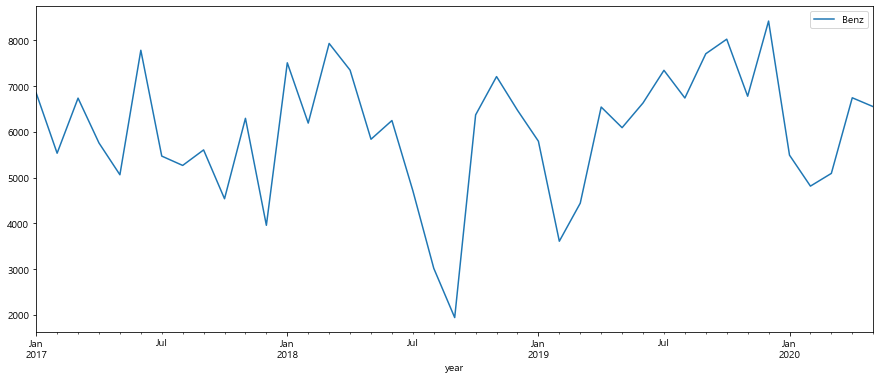

In [27]:
# Benz train data
Benz_train = result_Benz.loc[:'2020-05-01']
Benz_test = result_Benz.loc['2020-05-01':]
Benz_train.plot(figsize = (15,6))

<AxesSubplot:xlabel='year'>

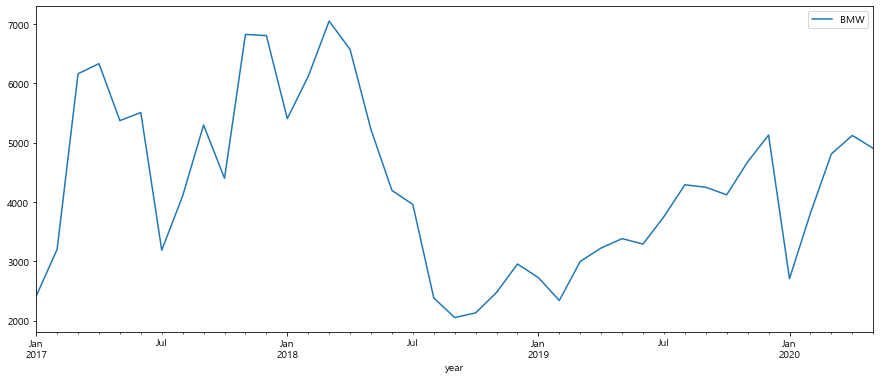

In [44]:
# BMW
BMW_train = result_BMW.loc[:'2020-05-01']
BMW_test = result_BMW.loc['2020-05-01':]
BMW_train.plot(figsize = (15,6))
# train data

<Figure size 432x288 with 0 Axes>

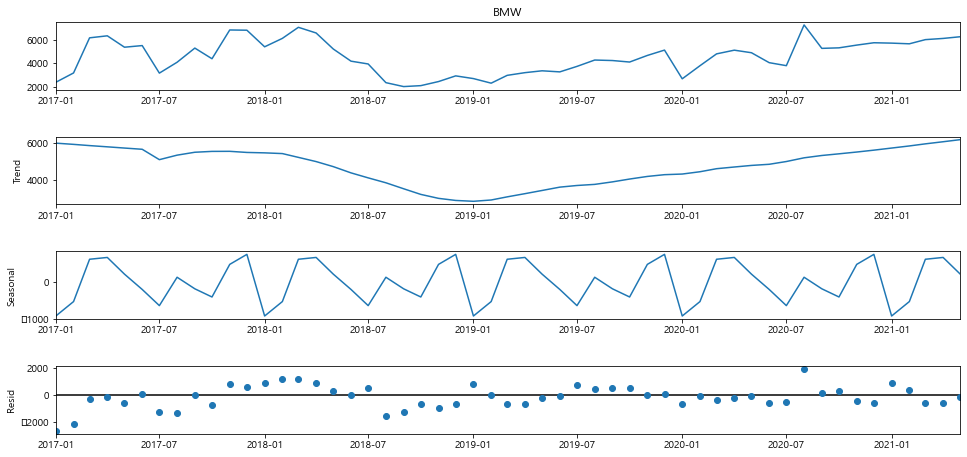

In [28]:
decomposition = seasonal_decompose(result_BMW['BMW'], model='additive', extrapolate_trend='freq')
# ValueError: You must specify a period or x must be a pandas object with a DatetimeIndex with a freq not set to None
# index를 year로 재설정
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(15,7)

<Figure size 432x288 with 0 Axes>

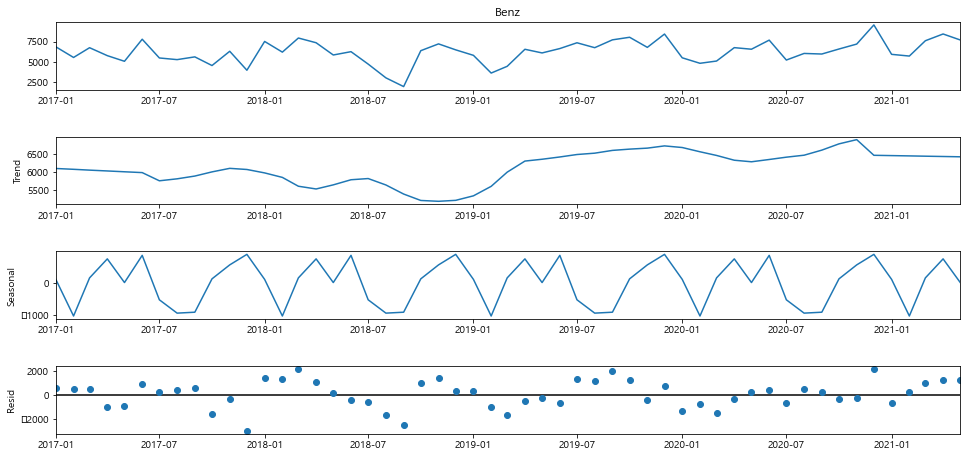

In [29]:
decomposition2 = seasonal_decompose(result_Benz['Benz'], model='additive', extrapolate_trend='freq')
fig = plt.figure()
fig = decomposition2.plot()
fig.set_size_inches(15,7)

## stationary 검증 방법 

In [35]:
# bmw
result2 = adfuller(result_BMW['BMW'])
result2

(-3.0147427042140826,
 0.03354036669069423,
 0,
 52,
 {'1%': -3.562878534649522,
  '5%': -2.918973284023669,
  '10%': -2.597393446745562},
 676.2432252758988)

In [36]:
#p-vslue 값이 0.03으로 정산성 확인
# stationary check 기능 함수
def adf_check(ts):
    result = adfuller(ts)
    if result[1] <=0.05:
        print('Stationary{}'.format(result[1]))
    else:
        print('Non-stationary {}'.format(result[1]))

In [37]:
adf_check(result_BMW['BMW'])#정상성 획득

Stationary0.03354036669069423


In [38]:
result3 = adfuller(Benz_train['Benz'])
result3
#정상성 X

(-4.390066509692944,
 0.0003090813442878268,
 0,
 40,
 {'1%': -3.6055648906249997, '5%': -2.937069375, '10%': -2.606985625},
 523.139395637008)

## differencing ##

In [39]:
Benz_train['1st diff'] = Benz_train['Benz'] - Benz_train['Benz'].shift(1)
Benz_train.head()

,Benz,1st diff
year,,
2017-01-01,6848,NaN
2017-02-01,5534,-1314.0
2017-03-01,6737,1203.0
2017-04-01,5758,-979.0
2017-05-01,5063,-695.0


In [40]:
# Nan 삭제
Benz_train['1st diff'].dropna(axis=0, how='any',inplace=False)

year
2017-02-01   -1314.0
2017-03-01    1203.0
2017-04-01    -979.0
2017-05-01    -695.0
2017-06-01    2720.0
2017-07-01   -2312.0
2017-08-01    -204.0
2017-09-01     339.0
2017-10-01   -1067.0
2017-11-01    1757.0
2017-12-01   -2337.0
2018-01-01    3550.0
2018-02-01   -1317.0
2018-03-01    1740.0
2018-04-01    -583.0
2018-05-01   -1510.0
2018-06-01     409.0
2018-07-01   -1533.0
2018-08-01   -1696.0
2018-09-01   -1076.0
2018-10-01    4428.0
2018-11-01     837.0
2018-12-01    -735.0
2019-01-01    -677.0
2019-02-01   -2185.0
2019-03-01     831.0
2019-04-01    2101.0
2019-05-01    -451.0
2019-06-01     540.0
2019-07-01     713.0
2019-08-01    -605.0
2019-09-01     967.0
2019-10-01     318.0
2019-11-01   -1246.0
2019-12-01    1642.0
2020-01-01   -2929.0
2020-02-01    -677.0
2020-03-01     278.0
2020-04-01    1652.0
2020-05-01    -194.0
Name: 1st diff, dtype: float64

In [41]:
# Nan 평균 대체
Benz_train['1st diff'].fillna(Benz_train['1st diff'].mean())

year
2017-01-01      -7.425
2017-02-01   -1314.000
2017-03-01    1203.000
2017-04-01    -979.000
2017-05-01    -695.000
2017-06-01    2720.000
2017-07-01   -2312.000
2017-08-01    -204.000
2017-09-01     339.000
2017-10-01   -1067.000
2017-11-01    1757.000
2017-12-01   -2337.000
2018-01-01    3550.000
2018-02-01   -1317.000
2018-03-01    1740.000
2018-04-01    -583.000
2018-05-01   -1510.000
2018-06-01     409.000
2018-07-01   -1533.000
2018-08-01   -1696.000
2018-09-01   -1076.000
2018-10-01    4428.000
2018-11-01     837.000
2018-12-01    -735.000
2019-01-01    -677.000
2019-02-01   -2185.000
2019-03-01     831.000
2019-04-01    2101.000
2019-05-01    -451.000
2019-06-01     540.000
2019-07-01     713.000
2019-08-01    -605.000
2019-09-01     967.000
2019-10-01     318.000
2019-11-01   -1246.000
2019-12-01    1642.000
2020-01-01   -2929.000
2020-02-01    -677.000
2020-03-01     278.000
2020-04-01    1652.000
2020-05-01    -194.000
Name: 1st diff, dtype: float64

In [42]:
Benz_train.info()
# Nan 평균 대체

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 41 entries, 2017-01-01 to 2020-05-01
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Benz      41 non-null     int32  
 1   1st diff  40 non-null     float64
dtypes: float64(1), int32(1)
memory usage: 820.0 bytes


In [43]:
adf_check(Benz_train['1st diff'].dropna())

Stationary3.117023469351639e-14


<AxesSubplot:xlabel='year'>

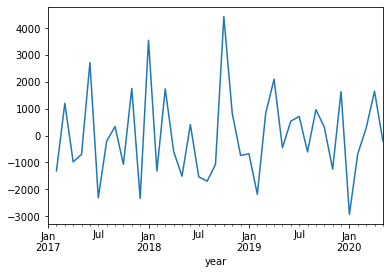

In [44]:
Benz_train['1st diff'].plot()

In [45]:
# d값은 1차 differencing이므로 1를 씀
# d = 1, D = 1

## differencing한 데이터로 acf, pacf 그리기

- acf란(자기상관함수, AutoCorrelation Function)
- 시차에 따른 일련의 자기 상관 의미, 시차가 커질수록 acf는 0에 가까워짐


In [46]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

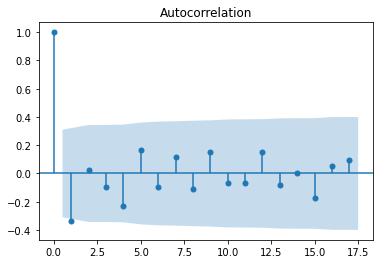

In [47]:
plot_acf(Benz_train['1st diff'].dropna());

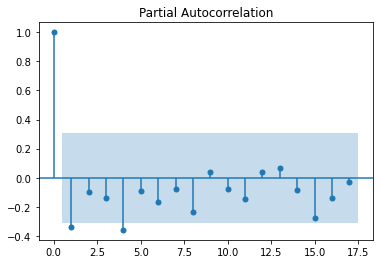

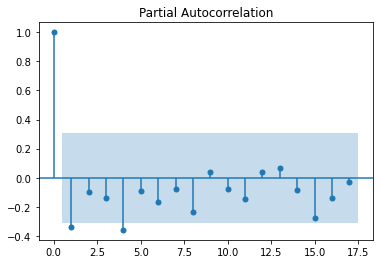

In [48]:
plot_pacf(Benz_train['1st diff'].dropna(), method='ywm')#partial AutoCorrelation

In [49]:
# acf에서 음수 1개씩 나왔으므로 p, q값은 각 P=1. Q=1씀

## 하이퍼 파라미터 정하기

In [ ]:
!pip install pmdarima

In [53]:
# auto_arima 함수로 자동 추출
# Benz
from pmdarima import auto_arima
stepwise_model = auto_arima(Benz_train['Benz'], start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=0.14 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=508.557, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=510.203, Time=0.03 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=508.397, Time=0.10 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=509.206, Time=0.03 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=inf, Time=0.23 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=inf, Time=0.35 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=509.925, Time=0.08 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=0.55 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=508.378, Time=0.03 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.12 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=inf, Time=0.22 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=509.599, Time=0.06 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=inf, Time=0.39 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=508.905, Time=0.05

In [51]:
# BMW
from pmdarima import auto_arima
stepwise_model = auto_arima(
BMW_train, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)



Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=2.53 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=480.426, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=471.580, Time=0.08 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.16 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=482.199, Time=0.01 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=472.129, Time=0.25 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.24 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=inf, Time=0.14 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=0.55 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=469.658, Time=0.06 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=470.489, Time=0.18 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=470.564, Time=0.14 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=inf, Time=0.08 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=0.39 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=471.597, Time=0.09

# ARIMA 학습 및 검증

## Benz 자동차 수 판매 예측

In [30]:
# 오류시 train data float64로 바꾸기
Benz_train  = Benz_train.astype({'Benz':'float64'})
# How to fix numpy TypeError: Cannot cast ufunc subtract output from dtype(‘float64’) to dtype(‘int64’) with casting rule ‘same_kind’

In [31]:
model = ARIMA(Benz_train['Benz'], order=(0,1,0))
# model = ARIMA(Benz_train, order=(0,1,1))

In [32]:
bresult= model.fit(trend='c', full_output=True, disp=-1)

In [33]:
bresult.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                 D.Benz   No. Observations:                   40
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -352.073
Method:                           css   S.D. of innovations           1608.241
Date:                Thu, 22 Jul 2021   AIC                            708.147
Time:                        08:33:09   BIC                            711.525
Sample:                    02-01-2017   HQIC                           709.368
                         - 05-01-2020                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.4250    254.285     -0.029      0.977    -505.815     490.965
==============================================================================
"""

In [34]:
bresult

<AxesSubplot:xlabel='year'>

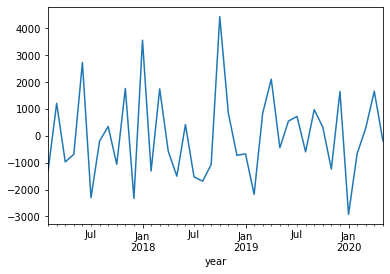

In [41]:
bresult.resid.plot()
# 잔차도 그래프 
# 잔차 = 실제값-예측값 차이 (잔차도를 줄일수록 예측 good)

<AxesSubplot:ylabel='Density'>

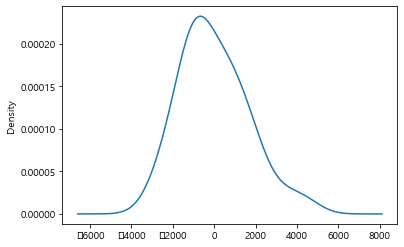

In [35]:
bresult.resid.plot(kind='kde')

## Forecast

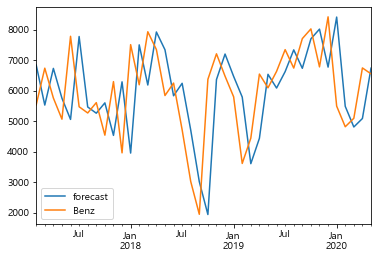

In [36]:
# 훈련이 잘됨
bresult.plot_predict(dynamic=False)
plt.show()

In [123]:
# Forecast
fc, se, conf  = bresult.forecast(steps=36, alpha=0.05)

In [154]:
#기간별 월단위 자동 데이터 생성

dt_index = pd.date_range(start='20210601',end='20240601', freq='M')
print(dt_index)
dt_list = dt_index.strftime("%Y-%m-%d").tolist()
print(dt_list)

DatetimeIndex(['2021-06-30', '2021-07-31', '2021-08-31', '2021-09-30',
               '2021-10-31', '2021-11-30', '2021-12-31', '2022-01-31',
               '2022-02-28', '2022-03-31', '2022-04-30', '2022-05-31',
               '2022-06-30', '2022-07-31', '2022-08-31', '2022-09-30',
               '2022-10-31', '2022-11-30', '2022-12-31', '2023-01-31',
               '2023-02-28', '2023-03-31', '2023-04-30', '2023-05-31',
               '2023-06-30', '2023-07-31', '2023-08-31', '2023-09-30',
               '2023-10-31', '2023-11-30', '2023-12-31', '2024-01-31',
               '2024-02-29', '2024-03-31', '2024-04-30', '2024-05-31'],
              dtype='datetime64[ns]', freq='M')
['2021-06-30', '2021-07-31', '2021-08-31', '2021-09-30', '2021-10-31', '2021-11-30', '2021-12-31', '2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30', '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31', '2022-09-30', '2022-10-31', '2022-11-30', '2022-12-31', '2023-01-31', '2023-02-28', '2023-03-31', '20

In [185]:
len(dt_list)

36

In [171]:
import sys
mod = sys.modules[__name__]

In [207]:
# 판다스 동적 반복 생성
for i in range(0,35):
    for dt in dt_list:
#     globals()'date{}'.format(i) = dt_list[i]
        setattr(mod, 'date{}'.format(i), dt)        

In [124]:
date1 = datetime(2021,6,1)
date2 = datetime(2021,7,1)
date3 = datetime(2021,8,1)
date4 = datetime(2021,9,1)
date5 = datetime(2021,10,1)
date6 = datetime(2021,11,1)
date7 = datetime(2021,12,1)
date8 = datetime(2022,1,1)
date9 = datetime(2022,2,1)
date10 = datetime(2022,3,1)
date11 = datetime(2022,4,1)
date12 = datetime(2022,5,1)
date13 = datetime(2022,6,1)
date14 = datetime(2022,7,1)
date15 = datetime(2022,8,1)
date16 = datetime(2022,9,1)
date17 = datetime(2022,10,1)
date18 = datetime(2022,11,1)
date19 = datetime(2022,12,1)
date20 = datetime(2023,1,1)
date21 = datetime(2023,2,1)
date22 = datetime(2023,3,1)
date23 = datetime(2023,4,1)
date24 = datetime(2023,5,1)
date25 = datetime(2023,6,1)
date26 = datetime(2023,7,1)
date27 = datetime(2023,8,1)
date28 = datetime(2023,9,1)
date29 = datetime(2023,10,1)
date30 = datetime(2023,11,1)
date31 = datetime(2023,12,1)
date32 = datetime(2024,1,1)
date33 = datetime(2024,2,1)
date34 = datetime(2024,3,1)
date35 = datetime(2024,4,1)
date36 = datetime(2024,5,1)

In [126]:
# Make as pandas series
fc_series = pd.Series(fc, index=[date1, date2, date3 ,date4 ,date5 ,date6 ,date7 ,date8 ,date9 ,date10 
,date11 ,date12 ,date13 ,date14 ,date15 ,date16 ,date17 ,date18 ,date19 ,date20 
,date21 ,date22 ,date23 ,date24 ,date25 ,date26 ,date27 ,date28 ,date29 ,date30 
,date31 ,date32 ,date33 ,date34 ,date35 ,date36])
# fc_series = pd.Series(fc, index=Benz_test.index)
fc_series

2021-06-01    6543.575
2021-07-01    6536.150
2021-08-01    6528.725
2021-09-01    6521.300
2021-10-01    6513.875
2021-11-01    6506.450
2021-12-01    6499.025
2022-01-01    6491.600
2022-02-01    6484.175
2022-03-01    6476.750
2022-04-01    6469.325
2022-05-01    6461.900
2022-06-01    6454.475
2022-07-01    6447.050
2022-08-01    6439.625
2022-09-01    6432.200
2022-10-01    6424.775
2022-11-01    6417.350
2022-12-01    6409.925
2023-01-01    6402.500
2023-02-01    6395.075
2023-03-01    6387.650
2023-04-01    6380.225
2023-05-01    6372.800
2023-06-01    6365.375
2023-07-01    6357.950
2023-08-01    6350.525
2023-09-01    6343.100
2023-10-01    6335.675
2023-11-01    6328.250
2023-12-01    6320.825
2024-01-01    6313.400
2024-02-01    6305.975
2024-03-01    6298.550
2024-04-01    6291.125
2024-05-01    6283.700
dtype: float64

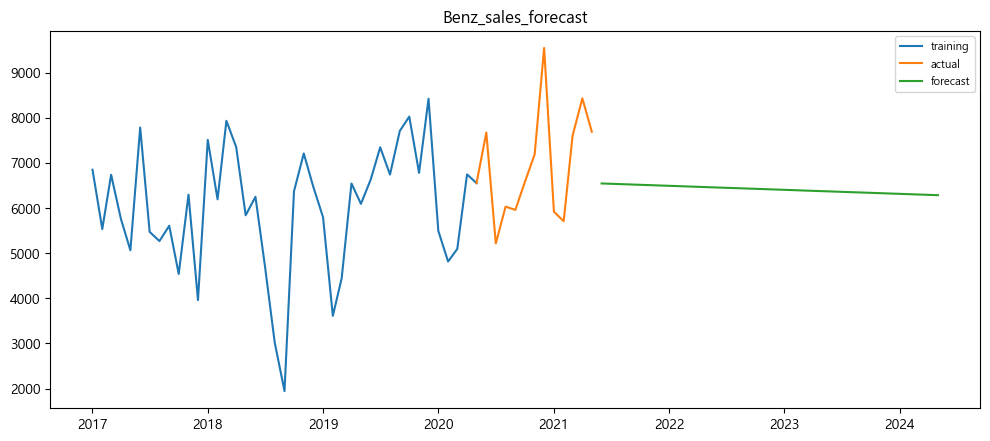

In [127]:
# plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(Benz_train, label='training')
plt.plot(Benz_test, label='actual')
plt.plot(fc_series, label='forecast')

plt.title('Benz_sales_forecast')
plt.legend(loc='upper right', fontsize=8)
plt.show()

## BMW 자동차 수 판매 예측

In [52]:
BMW_train  = BMW_train.astype({'BMW':'float64'})

In [133]:
model = ARIMA(BMW_train['BMW'], order=(0,1,0))
# model = ARIMA(Benz_train, order=(0,1,1))

In [134]:
BMW_result= model.fit(trend='c', full_output=True, disp=-1)

In [135]:
BMW_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                  D.BMW   No. Observations:                   40
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -334.972
Method:                           css   S.D. of innovations           1048.754
Date:                Thu, 22 Jul 2021   AIC                            673.944
Time:                        15:19:26   BIC                            677.321
Sample:                    02-01-2017   HQIC                           675.165
                         - 05-01-2020                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         62.3000    165.823      0.376      0.707    -262.706     387.306
==============================================================================
"""

In [136]:
BMW_train.head()

,BMW
year,
2017-01-01,2415.0
2017-02-01,3202.0
2017-03-01,6164.0
2017-04-01,6334.0
2017-05-01,5373.0


In [137]:
fc2, se, conf  = BMW_result.forecast(steps=36, alpha=0.05)

In [138]:
fc_series2 = pd.Series(fc2, index=[date1, date2, date3 ,date4 ,date5 ,date6 ,date7 ,date8 ,date9 ,date10 
,date11 ,date12 ,date13 ,date14 ,date15 ,date16 ,date17 ,date18 ,date19 ,date20 
,date21 ,date22 ,date23 ,date24 ,date25 ,date26 ,date27 ,date28 ,date29 ,date30 
,date31 ,date32 ,date33 ,date34 ,date35 ,date36])
fc_series2

2021-06-01    4969.3
2021-07-01    5031.6
2021-08-01    5093.9
2021-09-01    5156.2
2021-10-01    5218.5
2021-11-01    5280.8
2021-12-01    5343.1
2022-01-01    5405.4
2022-02-01    5467.7
2022-03-01    5530.0
2022-04-01    5592.3
2022-05-01    5654.6
2022-06-01    5716.9
2022-07-01    5779.2
2022-08-01    5841.5
2022-09-01    5903.8
2022-10-01    5966.1
2022-11-01    6028.4
2022-12-01    6090.7
2023-01-01    6153.0
2023-02-01    6215.3
2023-03-01    6277.6
2023-04-01    6339.9
2023-05-01    6402.2
2023-06-01    6464.5
2023-07-01    6526.8
2023-08-01    6589.1
2023-09-01    6651.4
2023-10-01    6713.7
2023-11-01    6776.0
2023-12-01    6838.3
2024-01-01    6900.6
2024-02-01    6962.9
2024-03-01    7025.2
2024-04-01    7087.5
2024-05-01    7149.8
dtype: float64

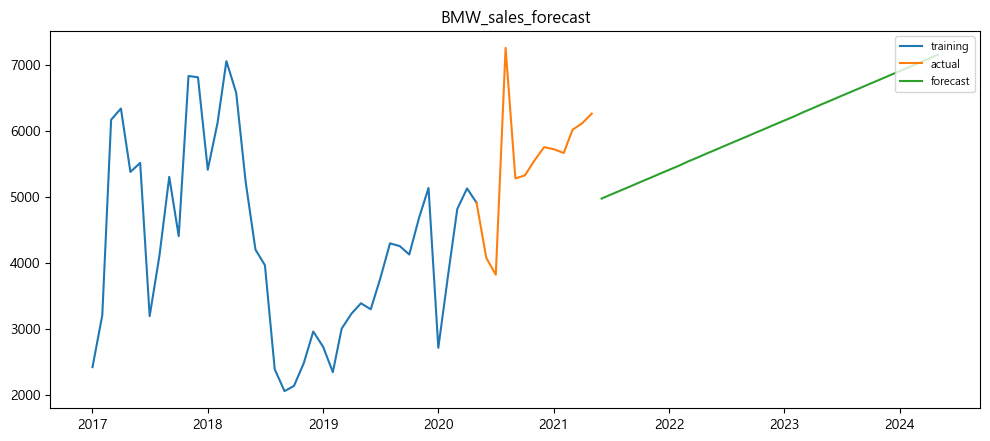

In [208]:
# plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(BMW_train, label='training')
plt.plot(BMW_test, label='actual')
plt.plot(fc_series2, label='forecast')
# plt.fill_between(x,y, color='aqua', alpha=0.5)

plt.title('BMW_sales_forecast')
plt.legend(loc='upper right', fontsize=8)
plt.show()

In [60]:
from pandas.tseries.offsets import DateOffset
future_dates3=[result_BMW.index[-1]+ DateOffset(months=x)for x in range(0,14)]
future_datest_df3=pd.DataFrame(index=future_dates3[1:],columns=result_BMW.columns)

future_datest_df3.tail()

future_df3=pd.concat([result_BMW,future_datest_df3])

# SARIMAX 학습 및 검증

## Benz 자동차 수 판매 예측 

In [95]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(Benz_train['Benz'],order=(0,1,0),seasonal_order=(0,2,1,12))
results=model.fit()

In [96]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                 Benz   No. Observations:                   41
Model:             SARIMAX(0, 1, 0)x(0, 2, [1], 12)   Log Likelihood                -146.404
Date:                              Thu, 22 Jul 2021   AIC                            296.807
Time:                                      14:24:11   BIC                            298.352
Sample:                                  01-01-2017   HQIC                           296.886
                                       - 05-01-2020                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12      -0.9867      0.313     -3.153      0.002      -1.600      -0.373
sigma2      3.953e+06   7.83e-08   5.05e+13      0.000    3.95e+06    3.95e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):                 2.45
Prob(Q):                              0.75   Prob(JB):                         0.29
Heteroskedasticity (H):               0.76   Skew:                            -0.92
Prob(H) (two-sided):                  0.77   Kurtosis:                         3.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.02e+29. Standard errors may be unstable.
"""

<AxesSubplot:xlabel='year'>

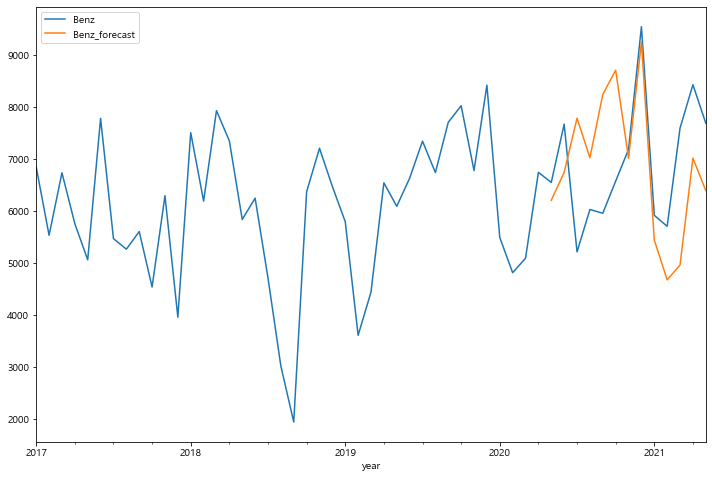

In [97]:
result_Benz['Benz_forecast']=results.predict(start=40,end=53,dynamic=True)
result_Benz[['Benz','Benz_forecast']].plot(figsize=(12,8))

## 2021년 5월 이후 date index 나타내기 

## AIC값 296

In [98]:
from pandas.tseries.offsets import DateOffset
future_dates=[result_Benz.index[-1]+ DateOffset(months=x)for x in range(0,35)]
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=result_Benz.columns)

future_datest_df.tail()

future_df=pd.concat([result_Benz,future_datest_df])

In [99]:
future_df

,Benz,Benz_forecast,Benz_forecast2
2017-01-01,6848,NaN,NaN
2017-02-01,5534,NaN,NaN
2017-03-01,6737,NaN,NaN
2017-04-01,5758,NaN,NaN
2017-05-01,5063,NaN,NaN
...,...,...,...
2023-11-01,NaN,NaN,NaN
2023-12-01,NaN,NaN,NaN
2024-01-01,NaN,NaN,NaN
2024-02-01,NaN,NaN,NaN


<AxesSubplot:>

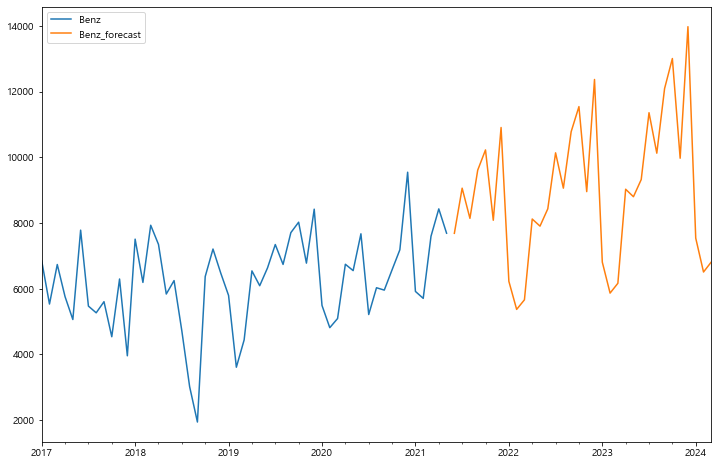

In [100]:
future_df['Benz_forecast'] = results.predict(start = 53, end = 88, dynamic= True)
future_df[['Benz', 'Benz_forecast']].plot(figsize=(12, 8))

## BMW 자동차 수 판매 예측

# AIC값 279

In [111]:
import statsmodels.api as sm
model2=sm.tsa.statespace.SARIMAX(BMW_train['BMW'],order=(0, 1, 0),seasonal_order=(1,2,0,12))
results2=model2.fit()

In [112]:
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                BMW   No. Observations:                   41
Model:             SARIMAX(0, 1, 0)x(1, 2, 0, 12)   Log Likelihood                -137.530
Date:                            Thu, 22 Jul 2021   AIC                            279.061
Time:                                    14:29:26   BIC                            280.606
Sample:                                01-01-2017   HQIC                           279.140
                                     - 05-01-2020                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.7299      0.146     -4.995      0.000      -1.016      -0.443
sigma2      1.473e+06   8.22e+05      1.792      0.073   -1.38e+05    3.08e+06
===================================================================================
Ljung-Box (L1) (Q):                   2.11   Jarque-Bera (JB):                 1.02
Prob(Q):                              0.15   Prob(JB):                         0.60
Heteroskedasticity (H):               0.96   Skew:                             0.15
Prob(H) (two-sided):                  0.97   Kurtosis:                         1.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='year'>

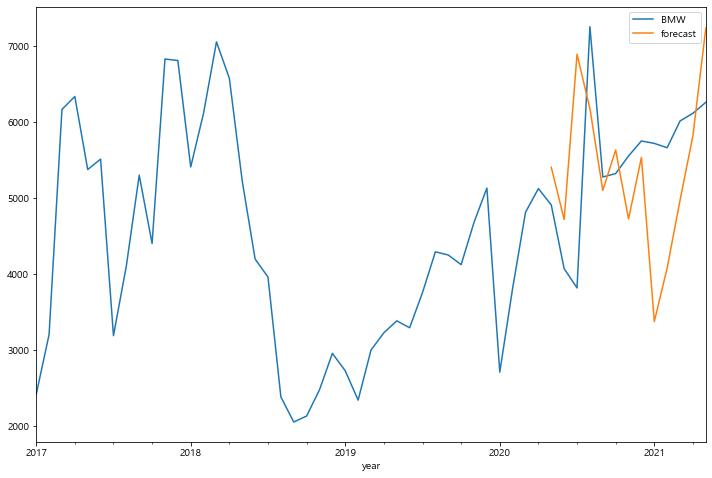

In [113]:
result_BMW['forecast']=results2.predict(start=40,end=53,dynamic=True)
result_BMW[['BMW','forecast']].plot(figsize=(12,8))

In [114]:
from pandas.tseries.offsets import DateOffset
future_dates2=[result_BMW.index[-1]+ DateOffset(months=x)for x in range(0,35)]
future_datest_df2=pd.DataFrame(index=future_dates2[1:],columns=result_BMW.columns)

future_datest_df2.tail()

future_df2=pd.concat([result_BMW,future_datest_df2])

<AxesSubplot:>

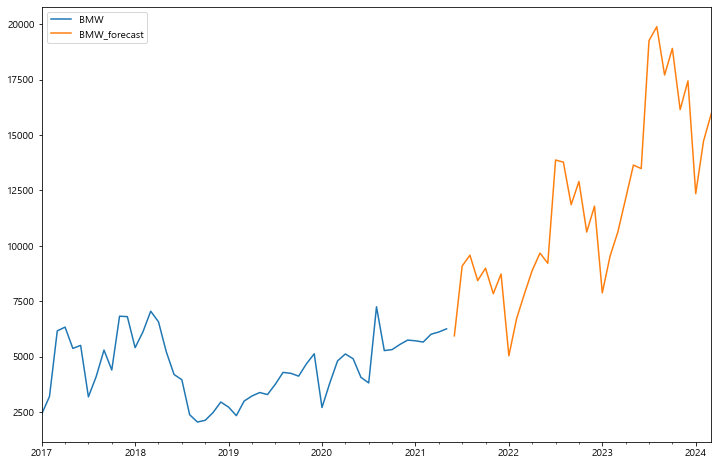

In [115]:
future_df2['BMW_forecast'] = results2.predict(start = 53, end = 88, dynamic= True)
future_df2[['BMW', 'BMW_forecast']].plot(figsize=(12, 8))

## Benzk, BMW는 SARIMAX 모델 더 적합

## 1) Benz, BMW 자동차 수 판매 예측 (Benz AIC값 296)

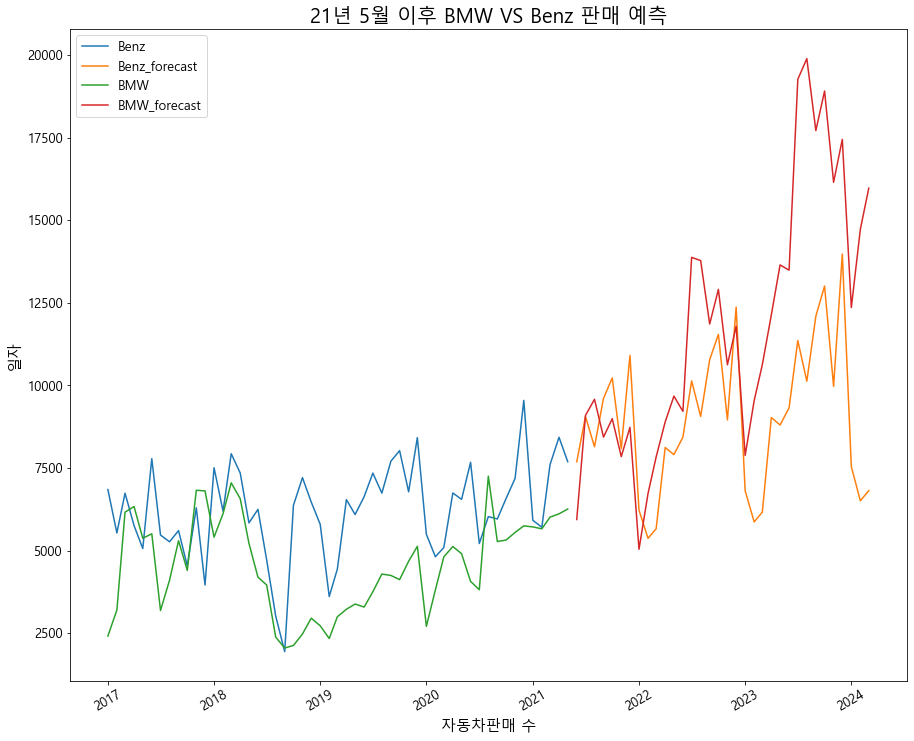

In [116]:
fig = plt.figure(figsize=(15,12)) ## 캔버스 생성
ax = fig.add_subplot() # 그림 뼈대(프레임) 생성

# Benz
ax.plot(future_df.index,future_df['Benz'], label='Benz') ## 선그래프 생성
ax.plot(future_df.index,future_df['Benz_forecast'], label='Benz_forecast') 
# BMW
ax.plot(future_df2.index,future_df2['BMW'], label='BMW') ## 선그래프 생성
ax.plot(future_df2.index,future_df2['BMW_forecast'], label='BMW_forecast') 

plt.yticks(fontsize=13) #y축 눈금 크기 설정
plt.xticks(rotation=30,fontsize=13) # x축 눈금 회전각도와 크기 설정

ax.legend(loc='best',fontsize=13) # 범례 생성

plt.ylabel('일자',rotation=90, fontsize=15, color='black') # y축 라벨
plt.xlabel('자동차판매 수',fontsize=15, color='black') # x축 라벨
          
plt.title('21년 5월 이후 BMW VS Benz 판매 예측',fontsize=20) # 타이틀 설정
plt.show()


## 정확도 평가

In [ ]:
len(future_df['forecast'][53:66])

In [ ]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
from math import sqrt
rmse(Benz_test['Benz'], future_df['forecast'][53:66])
# root_Mean_squared_error 평균 제곱근 오차

In [ ]:
mean_squared_error(Benz_test['Benz'], future_df['forecast'][53:66])
#평균제곱오차